mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Necessary Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

Load the Aggregated Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Predicting City Traffic Flow Based on Weather and Events/daily_traffic_weather.csv")

 Inspect the dataset

In [ ]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   province         440 non-null    object 
 1   max              440 non-null    int64  
 2   min              440 non-null    int64  
 3   wind             440 non-null    int64  
 4   wind_d           440 non-null    object 
 5   rain             440 non-null    float64
 6   humidi           440 non-null    int64  
 7   cloud            440 non-null    int64  
 8   pressure         440 non-null    int64  
 9   date             440 non-null    object 
 10  mean_velocity    440 non-null    float64
 11  median_velocity  440 non-null    float64
 12  std_velocity     440 non-null    float64
 13  long             440 non-null    float64
 14  lat              440 non-null    float64
 15  street_level     440 non-null    int64  
 16  e_node_id        440 non-null    int64  
 17  length          

Preprocessing

Check for missing values

In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 province           0
max                0
min                0
wind               0
wind_d             0
rain               0
humidi             0
cloud              0
pressure           0
date               0
mean_velocity      0
median_velocity    0
std_velocity       0
long               0
lat                0
street_level       0
e_node_id          0
length             0
street_type        0
dtype: int64


Select features for clustering

In [ ]:
features = ['rain', 'max', 'min', 'humidi', 'cloud', 'pressure', 'length', 'wind']
data = df[features]

Drop missing values

In [ ]:
df = df.dropna()

Standardize the data

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


Determine the optimal number of clusters using the Elbow Method

In [ ]:
inertia = []
k_values = range(1, 7)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

Plot the Elbow Curve

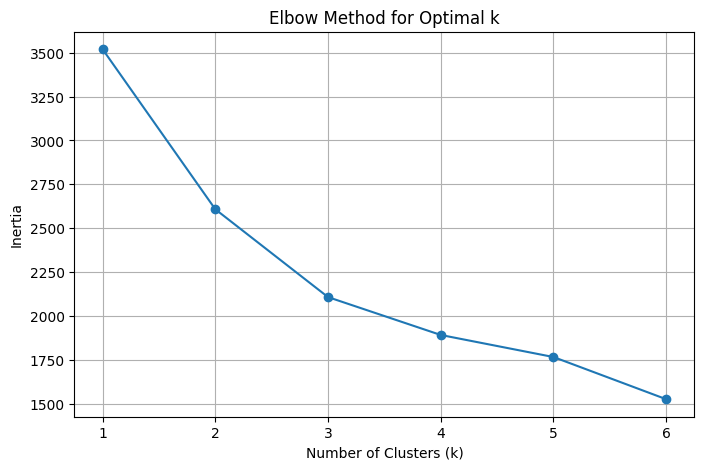

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Choose the optimal number of clusters

In [ ]:
k_optimal = 6  # Replace with the chosen number of clusters

Fit the K-Means model with k=6

In [ ]:
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=6, random_state=42)

Add cluster labels to the original dataset

In [ ]:
df['cluster'] = kmeans.labels_

Analyze clusters

In [ ]:
print(df.groupby('cluster')[features].mean())
print("Cluster Centroids (Standardized Features):")
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features)
print(centroids)

print("\nCluster Summary (Original Features):")
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)


              rain        max        min     humidi      cloud     pressure  \
cluster                                                                       
0         9.856000  25.440000  20.500000  86.540000  76.900000  1010.960000   
1         0.101075  22.817204  15.602151  65.150538  38.731183  1017.494624   
2         1.227397  33.219178  25.315068  67.520548  34.082192  1005.602740   
3         4.186992  30.723577  24.024390  77.959350  46.796748  1009.292683   
4        58.292308  24.769231  19.846154  89.846154  86.538462  1012.615385   
5         8.726136  28.431818  23.159091  83.625000  63.727273  1007.375000   

            length       wind  
cluster                        
0        61.449026  18.060000  
1        49.674973   7.032258  
2        41.208114  11.328767  
3        68.383086   8.943089  
4        56.045880  17.615385  
5        30.198229  10.465909  
Cluster Centroids (Standardized Features):
       rain       max       min    humidi     cloud  pressure    len

Visualize clusters (e.g., using the first two principal components)

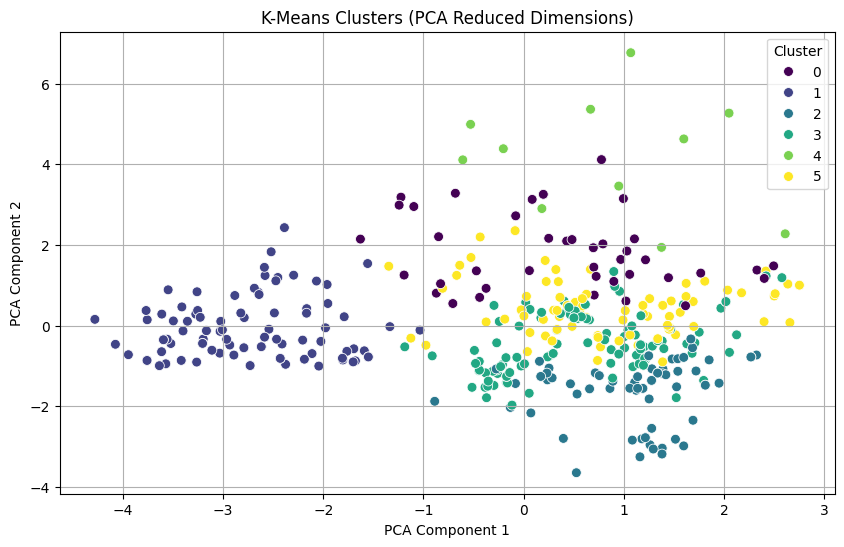

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['cluster'], palette='viridis', s=50)
plt.title('K-Means Clusters (PCA Reduced Dimensions)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Display cluster sizes

In [ ]:
cluster_sizes = df['cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
cluster
3    123
1     93
5     88
2     73
0     50
4     13
Name: count, dtype: int64


In [ ]:
df.columns

Index(['province', 'max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud',
       'pressure', 'date', 'mean_velocity', 'median_velocity', 'std_velocity',
       'long', 'lat', 'street_level', 'e_node_id', 'length', 'street_type',
       'cluster'],
      dtype='object')

Explore traffic patterns by cluster

In [ ]:
traffic_features = ['mean_velocity']
if set(traffic_features).issubset(df.columns):
    traffic_summary = df.groupby('cluster')[traffic_features].mean()
    print("Traffic Patterns by Cluster:")
    print(traffic_summary)
else:
    print("Traffic-specific features not found in the dataset.")


Traffic Patterns by Cluster:
         mean_velocity
cluster               
0            29.443558
1            27.230399
2            18.473082
3            27.179993
4            33.213890
5            12.327630


Visualize traffic patterns for each cluster

<ipython-input-68-ad4dc7b9a32e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['cluster'], y=df[feature], palette='viridis')


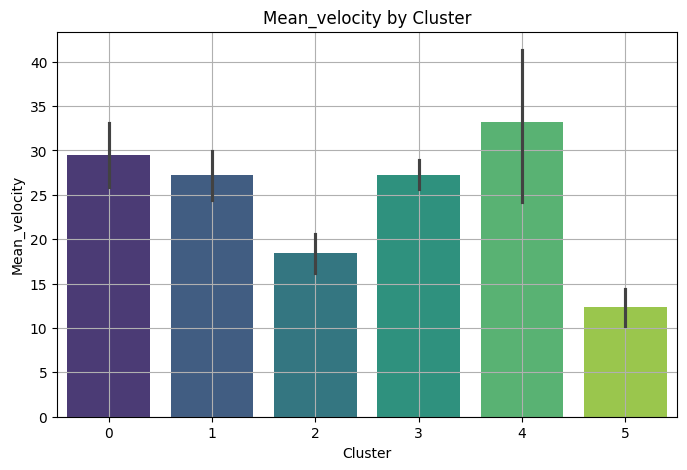

In [ ]:
for feature in traffic_features:
    if feature in df.columns:
        plt.figure(figsize=(8, 5))
        sns.barplot(x=df['cluster'], y=df[feature], palette='viridis')
        plt.title(f'{feature.capitalize()} by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(feature.capitalize())
        plt.grid(True)
        plt.show()

Heatmap of cluster means for weather and traffic-related features

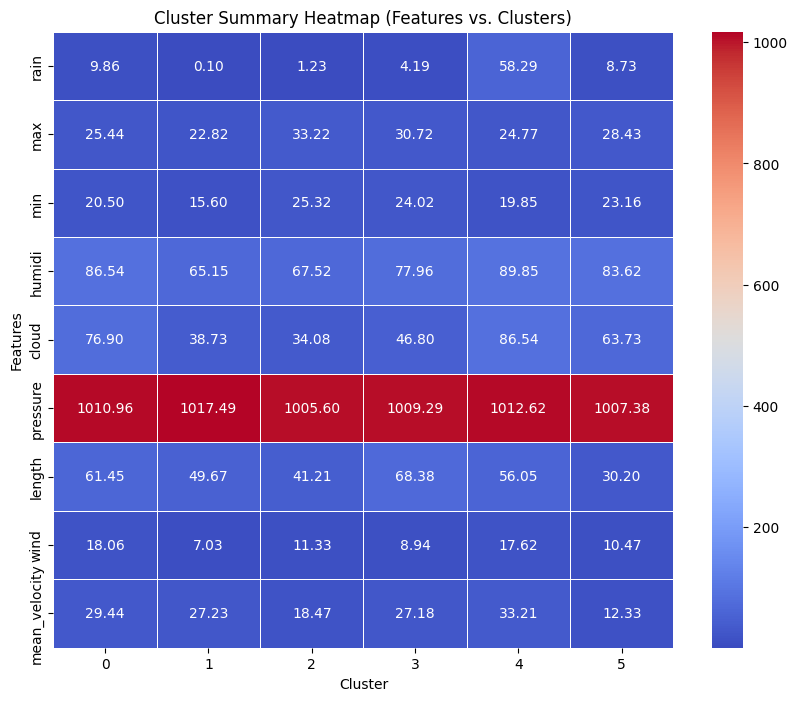

In [ ]:
features = ['rain', 'max', 'min', 'humidi', 'cloud', 'pressure', 'length', 'wind', 'mean_velocity','cluster']
df= df[features]
print
cluster_summary = df.groupby('cluster').mean()

plt.figure(figsize=(10, 8))
sns.heatmap(cluster_summary.T, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Cluster Summary Heatmap (Features vs. Clusters)")
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.show()

<ipython-input-70-1d4ebbae43ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['cluster'], y=df[feature], palette='viridis')


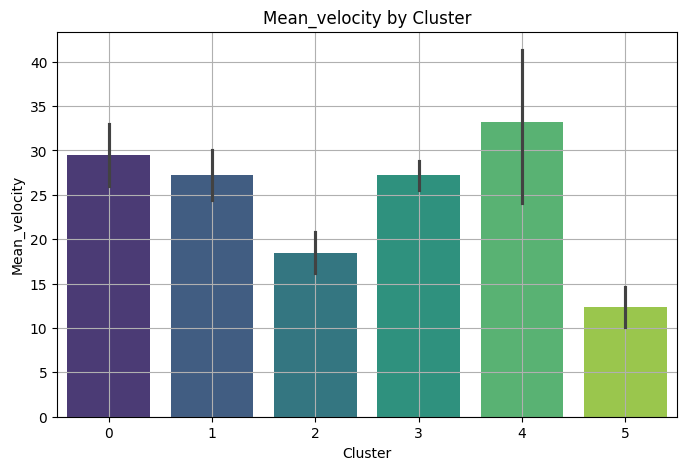

<ipython-input-70-1d4ebbae43ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['cluster'], y=df[feature], palette='viridis')


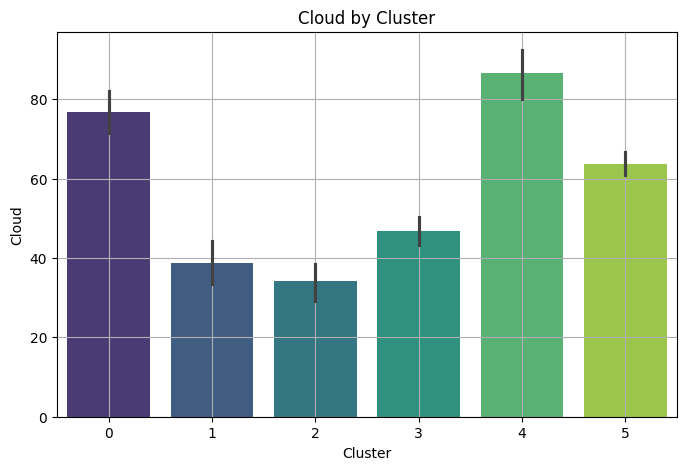

<ipython-input-70-1d4ebbae43ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['cluster'], y=df[feature], palette='viridis')


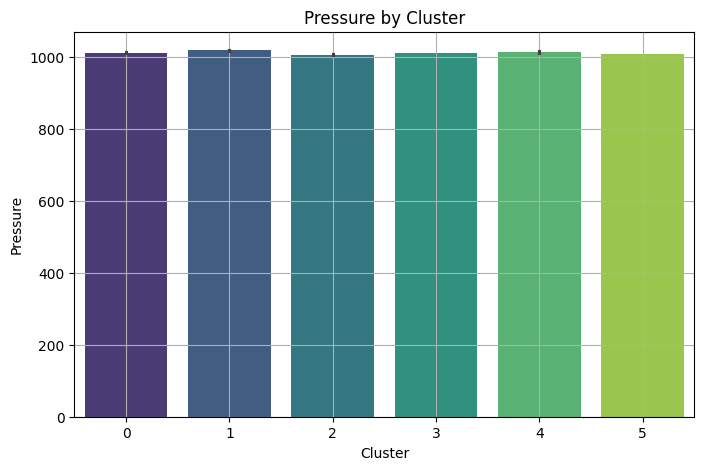

<ipython-input-70-1d4ebbae43ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['cluster'], y=df[feature], palette='viridis')


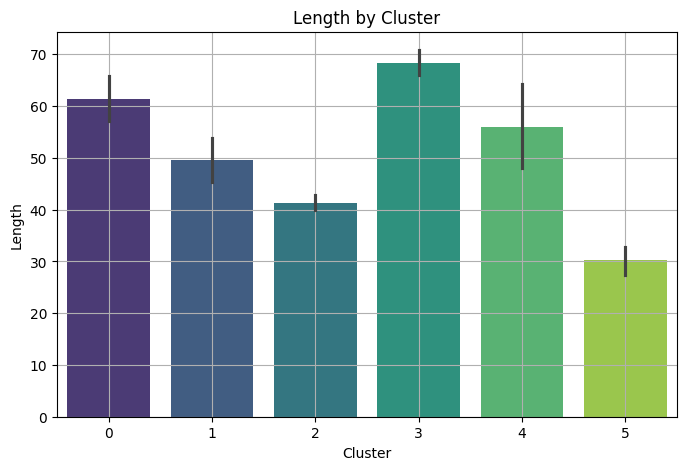

In [ ]:
selected_features = ['mean_velocity', 'cloud', 'pressure', 'length']  # Replace or expand as needed
for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=df['cluster'], y=df[feature], palette='viridis')
    plt.title(f'{feature.capitalize()} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature.capitalize())
    plt.grid(True)
    plt.show()

Save the Model

In [ ]:
import joblib
joblib.dump(kmeans, "/content/drive/MyDrive/Predicting City Traffic Flow Based on Weather and Events/kmeans_model.pkl")
print("Model saved successfully.")

Model saved successfully.


In [ ]:
from google.colab import files

# Replace the filename with your model's file path
files.download("/content/drive/MyDrive/Predicting City Traffic Flow Based on Weather and Events/kmeans_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>